In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Laptop Price Predictor/dataset/laptop_data.csv").drop(["Unnamed: 0"], axis=1)

df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
base_urls_startech = []

base_urls_startech.extend([f"https://www.startech.com.bd/laptop-notebook/laptop/hp-laptop?page={i}" for i in range(1, 6)])
base_urls_startech.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/hp-brand-laptops?page={i}" for i in range(1, 4)])
base_urls_startech.extend([f"https://www.startech.com.bd/laptop-notebook/laptop/dell-laptop?page={i}" for i in range(1, 4)])
base_urls_startech.extend([f"https://www.startech.com.bd/laptop-notebook/laptop/lenovo-laptop?page={i}" for i in range(1, 6)])
base_urls_startech.extend([f"https://www.startech.com.bd/laptop-notebook/laptop/asus-laptop?page={i}" for i in range(1, 9)])
base_urls_startech.extend([f"https://www.startech.com.bd/laptop-notebook/laptop/acer-laptop?page={i}" for i in range(1, 3)])
base_urls_startech.extend([f"https://www.startech.com.bd/laptop-notebook/laptop/msi-laptop?page={i}" for i in range(1, 5)])
base_urls_startech.extend([f"https://www.startech.com.bd/laptop-notebook/laptop/apple-macbook?page={i}" for i in range(1, 3)])
base_urls_startech.extend([f"https://www.startech.com.bd/toshiba-laptop?page={i}" for i in range(1, 2)])
base_urls_startech.extend([f"https://www.startech.com.bd/walton-laptop?page={i}" for i in range(1, 2)])
base_urls_startech.extend([f"https://www.startech.com.bd/samsung-laptop?page={i}" for i in range(1, 2)])
base_urls_startech.extend([f"https://www.startech.com.bd/huawei-laptop?page={i}" for i in range(1, 2)])
base_urls_startech.extend([f"https://www.startech.com.bd/gigabyte-laptop?page={i}" for i in range(1, 2)])

base_urls_startech, len(base_urls_startech)

(['https://www.startech.com.bd/laptop-notebook/laptop/hp-laptop?page=1',
  'https://www.startech.com.bd/laptop-notebook/laptop/hp-laptop?page=2',
  'https://www.startech.com.bd/laptop-notebook/laptop/hp-laptop?page=3',
  'https://www.startech.com.bd/laptop-notebook/laptop/hp-laptop?page=4',
  'https://www.startech.com.bd/laptop-notebook/laptop/hp-laptop?page=5',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/hp-brand-laptops?page=1',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/hp-brand-laptops?page=2',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/hp-brand-laptops?page=3',
  'https://www.startech.com.bd/laptop-notebook/laptop/dell-laptop?page=1',
  'https://www.startech.com.bd/laptop-notebook/laptop/dell-laptop?page=2',
  'https://www.startech.com.bd/laptop-notebook/laptop/dell-laptop?page=3',
  'https://www.startech.com.bd/laptop-notebook/laptop/lenovo-laptop?page=1',
  'https://www.startech.com.bd/laptop-notebook/laptop/lenovo

In [ ]:
base_urls_techland = []

base_urls_techland.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/asus-laptop?page={i}" for i in range(1, 9)])
base_urls_techland.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/hp-brand-laptops?page={i}" for i in range(1, 4)])
base_urls_techland.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/shop-dell-laptops?page={i}" for i in range(1, 3)])
base_urls_techland.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/shop-lenovo-laptops?page={i}" for i in range(1, 4)])
base_urls_techland.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/shop-acer-laptop?page={i}" for i in range(1, 4)])
base_urls_techland.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/shop-msi-laptop?page={i}" for i in range(1, 3)])
base_urls_techland.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/apple-macbook?page={i}" for i in range(1, 2)])
base_urls_techland.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/laptop-huawei?page={i}" for i in range(1, 2)])
base_urls_techland.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/toshiba-laptop?page={i}" for i in range(1, 2)])
base_urls_techland.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/walton-laptop?page={i}" for i in range(1, 2)])
base_urls_techland.extend([f"https://www.techlandbd.com/shop-laptop-computer/brand-laptops/gigabyte-laptop?page={i}" for i in range(1, 2)])

base_urls_techland, len(base_urls_techland)

(['https://www.techlandbd.com/shop-laptop-computer/brand-laptops/asus-laptop?page=1',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/asus-laptop?page=2',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/asus-laptop?page=3',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/asus-laptop?page=4',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/asus-laptop?page=5',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/asus-laptop?page=6',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/asus-laptop?page=7',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/asus-laptop?page=8',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/hp-brand-laptops?page=1',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/hp-brand-laptops?page=2',
  'https://www.techlandbd.com/shop-laptop-computer/brand-laptops/hp-brand-laptops?page=3',
  'https://www.techlandbd.com/shop-lapt

In [ ]:
base_urls_ryans = []

base_urls_ryans.extend([f"https://www.ryanscomputers.com/category/all-laptop-macbook?limit=60&osp=0"])
base_urls_ryans.extend([f"https://www.ryanscomputers.com/category/all-laptop-huawei"])
base_urls_ryans.extend([f"https://www.ryanscomputers.com/category/all-laptop-msi"])
base_urls_ryans.extend([f"https://www.ryanscomputers.com/category/all-laptop-lenovo?limit=80&osp=0"])
base_urls_ryans.extend([f"https://www.ryanscomputers.com/category/all-laptop-hp?limit=60&osp=0"])
base_urls_ryans.extend([f"https://www.ryanscomputers.com/category/all-laptop-gigabyte"])
base_urls_ryans.extend([f"https://www.ryanscomputers.com/category/all-laptop-dell?limit=60&osp=0"])
base_urls_ryans.extend([f"https://www.ryanscomputers.com/category/all-laptop-asus?limit=100&osp=0%3Fpage%3D2&page={i}" for i in range(1, 3)])
base_urls_ryans.extend([f"https://www.ryanscomputers.com/category/all-laptop-apple?limit=60&osp=0?page={i}" for i in range(1, 2)])
base_urls_ryans.extend([f"https://www.ryanscomputers.com/category/all-laptop-acer?limit=80&osp=0?page={i}" for i in range(1, 2)])
base_urls_ryans.extend([f"https://www.ryanscomputers.com/category/all-laptop-gaming?limit=80&osp=0?page={i}" for i in range(1, 2)])

base_urls_ryans, len(base_urls_ryans)

(['https://www.ryanscomputers.com/category/all-laptop-macbook?limit=60&osp=0',
  'https://www.ryanscomputers.com/category/all-laptop-huawei',
  'https://www.ryanscomputers.com/category/all-laptop-msi',
  'https://www.ryanscomputers.com/category/all-laptop-lenovo?limit=80&osp=0',
  'https://www.ryanscomputers.com/category/all-laptop-hp?limit=60&osp=0',
  'https://www.ryanscomputers.com/category/all-laptop-gigabyte',
  'https://www.ryanscomputers.com/category/all-laptop-dell?limit=60&osp=0',
  'https://www.ryanscomputers.com/category/all-laptop-asus?limit=100&osp=0%3Fpage%3D2&page=1',
  'https://www.ryanscomputers.com/category/all-laptop-asus?limit=100&osp=0%3Fpage%3D2&page=2',
  'https://www.ryanscomputers.com/category/all-laptop-apple?limit=60&osp=0?page=1',
  'https://www.ryanscomputers.com/category/all-laptop-acer?limit=80&osp=0?page=1',
  'https://www.ryanscomputers.com/category/all-laptop-gaming?limit=80&osp=0?page=1'],
 12)

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
## source site: https://startech.com.bd/


def fetch_details_startech(URL):
  r = requests.get(URL) 
  soup = BeautifulSoup(r.content, 'html5lib')
  data_list = []

  laptop_urls = [div.a for div in soup.findAll("div", attrs={"class":"p-item-details"})] 

  for url in laptop_urls:
    r = requests.get(url['href']) 
    soup = BeautifulSoup(r.content, 'html5lib')
    data_dict = {}

    name = url.text.strip()
    try:
      price = soup.find('td', attrs={"class": "product-info-data product-regular-price"}).text
    except:
      price = ""
    cpu = ""
    ScreenResolution = ""
    ram = ""
    memory = ""
    gpu = ""
    weight = ""
    os = ""
    tbody = soup.find('table', attrs={"class": "data-table flex-table"}).find_all(['thead', 'tbody'])

    for i in range(0, len(tbody), 2):
      new = tbody[i:i+2]
      if new[0].text.strip() == "Processor":
        i = 0
        for tr in new[1]:
          try:
            pr = tr.text.strip()[15:]
            cpu += f"{pr} "
          except:
            pass
          i += 1
          
          if i == 3:
            break

      if new[0].text.strip() == "Display":
        j = 0
        for tr in new[1]:
          try:
            sc = tr.text.strip()
            ScreenResolution += f"{sc} "
          except:
            pass
          j += 1
          
          if j == 5:
            break

      if new[0].text.strip() == "Memory":
        k = 0
        for tr in new[1]:
          try:
            rm = "".join(tr.text.strip().replace("RAM", "").split())
            ram += f"{rm} ".lower().replace("(onboard)", "")
          except:
            pass
          k += 1
          
          if k == 2:
            break

      if new[0].text.strip() == "Storage":
        l = 0
        for tr in new[1]:
          try:
            mm = tr.text.strip()
            memory += f"{mm} "
          except:
            pass
          l += 1
          
          if l == 3:
            break

      if new[0].text.strip() == "Graphics":
        m = 0
        for tr in new[1]:
          try:
            gg = tr.text.strip()
            gpu += f"{gg} "
          except:
            pass
          m += 1
          
          if m == 3:
            break

      if new[0].text.strip() == "Physical Specification":
        for tr in new[1]:
          try:
            ww = tr.text.strip()
            weight += f"{ww} "
          except:
            pass

      if new[0].text.strip() == "Software":
        for tr in new[1]:
          try:
            o = tr.text.strip()
            os += f"{o} "
          except:
            pass

      

    ScreenResolution = ScreenResolution.replace("Display Size", "").replace("Display Type", "").replace("Display Resolution", "")
    memory = memory.replace("Storage Type", "").replace("Storage Capacity", "")
    gpu = gpu.replace("Graphics Model", "").replace("Graphics Memory", "")
    weight = weight.replace("Color", "").replace("Dimensions", "").replace("Weight", "")
    os = os.replace("Operating System", "")
          
    data_list.append(dict(zip(["Name", "Price", "Cpu", "ScreenResolution", "Ram", "Memory", "Gpu", "OpSys", "Weight"], [name, price, cpu, ScreenResolution, ram, memory, gpu, os, weight])))

  return data_list

In [ ]:

# datas = fetch_details_startech("https://www.startech.com.bd/laptop-notebook/laptop/asus-laptop?sort=p.price&order=DESC")


In [ ]:
# datas

In [ ]:
df_data1 = []

In [ ]:

for url in base_urls_startech:
  df_data1.extend(fetch_details_startech(url))


In [ ]:
laptop_df1 = pd.DataFrame(df_data1)

In [ ]:
len(df_data1)

561

In [ ]:
laptop_df1.replace("", np.NaN, inplace=True)

In [ ]:
laptop_df1.dropna(inplace=True)

In [ ]:
laptop_df1.reset_index(inplace=True, drop=True)

In [ ]:
laptop_df1["Ram"] = laptop_df1["Ram"].str.upper()

In [ ]:
laptop_df1

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight
0,"HP 15s-du3611TU Core i3 11th Gen 15.6"" FHD Laptop","58,090৳",Intel Core i3-1125G4,15.6 Inch FHD (1920 x 1080) Display FeaturesMi...,4GB(1X4GBREMOVABLE),SATA HDD 1 TB,Intel UHD Graphics Shared,Windows 11 Home,Black 35.85 x 24.2 x 1.99 cm 1.75 kg
1,"HP 250 G8 Core i3 11th Gen 15.6"" FHD Laptop","62,430৳",Intel Core i3-1115G4,15.6 Inch IPS FHD (1920 x 1080) Display Featur...,1X8GBREMOVABLE,SATA HDD 1TB,Intel UHD Graphics Shared,Windows 10 Home,Black 32.41 x 22.58 x 1.98 cm 1.47 kg
2,"HP 15s-eq2171AU Ryzen 3 5300U 15.6"" FHD Laptop","64,600৳",AMD Ryzen 3 5300U,15.6 Inch FHD (1920 x 1080) Touch ScreenNo Dis...,8GB(2X4GB),PCIe NVMe M.2 SSD 512 GB,AMD Radeon Graphics Shared,Windows 11 Home,Spruce Blue 35.85 x 24.2 x 1.79 cm 1.69 kg
3,"HP 15s-fq5486TU Core i3 12th Gen 15.6"" FHD Laptop","62,970৳",Intel Core i3-1215U,15.6 Inch IPS FHD (1920 x 1080) Display Featur...,1X4GBREMOVABLE,PCIe NVMe M.2 SSD 256 GB,Intel UHD Graphics Shared,Windows 11 Home,Black 35.85 x 24.2 x 1.79 cm Starting at 1.7 kg
4,"HP 15s-fq5487TU Core i3 12th Gen 15.6"" FHD Laptop","67,310৳",Intel Core i3-1215U,15.6 Inch IPS FHD (1920 x 1080) Display Featur...,8GB,PCIe NVMe M.2 SSD 256 GB,Intel UHD Graphics Shared,Windows 11 Home,Silver 35.85 x 24.2 x 1.79 cm Starting at 1.7 kg
...,...,...,...,...,...,...,...,...,...
250,GIGABYTE Aorus 15P XD Core i7 11th Gen RTX 307...,"241,460৳",Intel Core i7-11800H,15.6 Inch IPS FHD 1920x1080 Touch ScreenNO,16GB(8GBX2),M.2 NVMe SSD 1TB,NVIDIA GeForce RTX 3070 8GB,Windows 10 Home,Black 357(W) x 244(D)x27(H)mm\n14.0(W) x 9.6(D...
251,GIGABYTE AERO 5 KE4 Core i7 12th Gen RTX 3060 ...,"240,870৳",Intel Core i7-12700H,15.6 Inch OLED 4K UHD (3840x2160) Touch ScreenNo,16GB(8GBX2),NVMe PCIe Gen4 SSD 1TB,NVIDIA GeForce RTX 3060 6GB,Windows 11 Home,Mate Black 35.7(W) x 25.4(D) x 2.36 ~ 2.74(H) ...
252,GIGABYTE Aorus 15G XC Core i7 10th Gen RTX 307...,"246,300৳",Intel Core i7-10870H,15.6 Inch IPS FHD 1920x1080 Touch ScreenNo,32GB(16GBX2),NVMe PCIe SSD 512GB,NVIDIA GeForce RTX 3070Q 8GB,Windows 10 Home,Black 357(W) x 244(D)x23(H)mm\n14.0(W) x 9.6(D...
253,GIGABYTE AORUS 5 SE4 Core i7 12th Gen RTX 3070...,"250,140৳",Intel Core i7-12700H,15.6 Inch IPS FHD (1920x1080) Touch ScreenNo,16GB(8GBX2),NVMe PCIe Gen4 SSD 512GB,NVIDIA GeForce RTX 3070 8GB,Windows 11 Home,Mate Black 35.7(W) x 25.4(D) x 2.36 ~ 2.74(H) ...


In [ ]:
laptop_df1.to_csv("laptop_df1.csv", index=False)

In [ ]:
## source site: https://www.techlandbd.com/


def fetch_details_techland(URL):
  r = requests.get(URL) 
  soup = BeautifulSoup(r.content, 'html5lib')
  data_list = []

  laptop_urls = [div.a for div in soup.findAll("div", attrs={"class":"name"})] 

  for url in laptop_urls:
    try:
      r = requests.get(url['href']) 
      soup = BeautifulSoup(r.content, 'html5lib')
      name = url.text.strip()
      price = soup.find_all('table')[0].find_all('td')[1].text

      datas = [tr.find('td', attrs={"class": "attribute-value"}).text for tr in soup.find_all('table')[1].find_all('tr')[1:]]

      data_list.append(dict(zip(["Name", "Price", "Cpu", "ScreenResolution", "Ram", "Memory", "Gpu", "OpSys", "Weight"], 
                                [name, price, datas[0], datas[4], datas[1], datas[2], datas[3], datas[7], datas[-2]])))
    except:
      pass

  return data_list   


In [ ]:
df_data2 = []

In [ ]:

for url in base_urls_techland:
  df_data2.extend(fetch_details_techland(url))


In [ ]:
laptop_df2 = pd.DataFrame(df_data2)

In [ ]:
laptop_df2.isnull().sum()

Name                0
Price               0
Cpu                 0
ScreenResolution    0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
dtype: int64

In [ ]:
laptop_df2.to_csv("laptop_df2.csv", index=False)

In [ ]:
## source site: https://www.techlandbd.com/


def fetch_details_ryans(URL):
  r = requests.get(URL) 
  soup = BeautifulSoup(r.content, 'html5lib')
  data_list = []

  laptop_urls = [div.find('p', attrs={"class": "card-text p-0 m-0 grid-view-text"}).a for div in soup.findAll("div", attrs={"class":"card-body text-center"})] 

  for url in laptop_urls:
    try:
      r = requests.get(url['href']) 
      soup = BeautifulSoup(r.content, 'html5lib')
      name = soup.h1.text.strip()
      price = soup.find('span', attrs={"class": "rp-block mb-2"}).text.strip().replace("Regular Price Tk ", "")
      cpu = ""
      ram = ""
      memory = ""
      gpu = ""
      ScreenResolution = ""
      os = ""
      weight = ""
      i = 1

      for div in soup.find_all('div', attrs={"class": "grid-container for-last-hr"})[1:-3]:
        text = ""

        for div2 in div.find_all('div', attrs={"class": "row table-hr-remove"}):
            text += f'''{div2.find('div', attrs={"class": "col-lg-8 col-12 ps-5 ps-lg-0"}).text.strip()} '''

        
        if i == 1:
          cpu = text
        elif i == 2:
          ram = text 
        elif i == 3:
          memory = text
        elif i == 4:
          gpu = text
        elif i == 5:
          ScreenResolution = text
        elif i == 11:
          os = text
        elif i == 12:
          weight = text
        i += 1

      data_list.append(dict(zip(["Name", "Price", "Cpu", "ScreenResolution", "Ram", "Memory", "Gpu", "OpSys", "Weight"], [name, price, cpu, ScreenResolution, ram, memory, gpu, os, weight])))
    except:
      pass

  return data_list
    

In [ ]:
df_data3 = []

In [ ]:


for url in base_urls_ryans:
  df_data3.extend(fetch_details_ryans(url))



In [ ]:
laptop_df3 = pd.DataFrame(df_data3)

In [ ]:
laptop_df3

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight
0,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,"122,060",Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8GB 1 x 8GB Non-Removable Not Specified Not Sp...,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,"macOS App Store, Books, Calendar, Contacts, Fa...",Aluminum No Space Gray 304.1 x 212.4 x 4.1-16....
1,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,"122,060",Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8GB 1 x 8GB Non-Removable Not Specified Not Sp...,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,"macOS App Store, Books, Calendar, Contacts, Fa...",Aluminum No Gold 304.1 x 212.4 x 4.1-16.1mm 1....
2,Apple MacBook Air (Late 2020) Apple M1 Chip 13...,"168,720",Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,16GB 1 x 16GB Non-Removable Not Specified Not ...,256GB No HDD No HDD No NVMe PCIe No Installed ...,Apple 7-core GPU Integrated Shared Not Applica...,"macOS App Store, Books, Calendar, Contacts, Fa...",Aluminum No Space Gray 304.1 x 212.4 x 4.1-16....
3,Apple MacBook Air (2022) Apple M2 Chip 512GB S...,"187,710",Apple Apple M2 Not Applicable Apple M2 Chip No...,13.6 Liquid Retina QHD 2560x1664 Glossy No 60 ...,8GB 1 x 8GB Non-Removable Not Specified Not Sp...,512GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 10-core GPU Integrated Shared Not Applic...,"macOS App Store, Books, Calendar, Contacts, Fa...",Aluminum No Space Gray 304 x 214.9 x 11.2mm 1....
4,Apple MacBook Air (2022) Apple M2 Chip 13.6 In...,"187,710",Apple Apple M2 Not Applicable Apple M2 Chip No...,13.6 Liquid Retina QHD 2560x1664 Glossy No 60 ...,8GB 1 x 8GB Non-Removable Not Specified Not Sp...,512GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 10-core GPU Integrated Shared Not Applic...,"macOS App Store, Books, Calendar, Contacts, Fa...",Aluminum No Silver 304 x 214.9 x 11.2mm 1.24 k...
...,...,...,...,...,...,...,...,...,...
331,Gigabyte AORUS 5 SE4 Intel Core i7 12700H 15.6...,"250,640",Intel Core i7 12th (Intel) Core i7 12700H 2.30...,15.6 FHD LED Display Full HD 1920x1080 Anti-gl...,16GB 2 x 8GB DDR4 3200 MHz 2 No 64GB No No,512GB SSD No HDD No HDD Not Specified NVMe PCI...,NVIDIA GeForce RTX 3070 Graphics Dedicated 8GB...,Win-11 Home Not Specified Not Specified,Not Specified No Matt Black 357 x 254 x23.6mm ...
332,HP OMEN 16-c0456AX AMD Ryzen 9 5900H 16.1 Inch...,"260,400",AMD Ryzen 9 Not Applicable Ryzen 9 5900H 3.10 ...,16.1 FHD IPS LED Display Full HD 1920x1080 Ant...,16GB 2 x 8GB DDR4 3200 MHz 2 No Not Specified ...,1TB SSD No HDD No HDD Not Specified NVMe PCIe ...,Nvidia RTX 3070 Dedicated 8GB GDDR6,Win-11 Home Not Specified Microsoft Office,Not Specified No Mica Silver 369.2 x 248 x 23m...
333,Asus ROG Zephyrus G14 GA402RJ AMD Ryzen 9 6900...,"279,930",AMD Ryzen 9 Not Applicable Ryzen 9 6900HS 3.30...,15.6 WQXGA IPS LED Display QHD 2560x1600 Anti-...,"16GB 1 x 8GB Non-Removable, 1 x 8GB Removable ...",1TB SSD No HDD No HDD Not Specified NVMe PCIe ...,AMD Radeon RX 6700S Graphics Dedicated 8GB GDDR6,"Win-11 Home Built-in Apps: McAfee, MyASUS, Scr...",Not Specified AniMe Matrix Gray 312 x 227 x 19...
334,Asus ROG Zephyrus G15 GA503RM AMD Ryzen 7 6800...,"284,270",AMD Ryzen 7 Not Applicable Ryzen 7 6800HS 3.20...,15.6 2K WQHD LED QHD 2560x1440 Anti-glare No 2...,16GB Not Specified DDR4 4800 MHz Not Specified...,1TB SSD No HDD No HDD Not Specified NVMe PCIe ...,Nvidia RTX 3060 Graphics Dedicated 6GB GDDR6,Win-11 Home Not Specifiedc Not Specified,Not Specified No Eclipse Gray 355 x 243 x 19.9...


In [ ]:
laptop_df3.to_csv("laptop_df3.csv", index=False)

In [6]:
laptop_df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Laptop Price Predictor/dataset/laptop_df1.csv")
laptop_df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Laptop Price Predictor/dataset/laptop_df2.csv")
laptop_df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Laptop Price Predictor/dataset/laptop_df3.csv")

In [7]:
laptop_df1["Price"] = laptop_df1["Price"].str.replace("৳", "")
laptop_df1["Price"] = laptop_df1["Price"].apply(lambda x : x + " bdt")

laptop_df1.head()

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight
0,"HP 15s-du3611TU Core i3 11th Gen 15.6"" FHD Laptop","58,090 bdt",Intel Core i3-1125G4,15.6 Inch FHD (1920 x 1080) Display FeaturesMi...,4GB(1X4GBREMOVABLE),SATA HDD 1 TB,Intel UHD Graphics Shared,Windows 11 Home,Black 35.85 x 24.2 x 1.99 cm 1.75 kg
1,"HP 250 G8 Core i3 11th Gen 15.6"" FHD Laptop","62,430 bdt",Intel Core i3-1115G4,15.6 Inch IPS FHD (1920 x 1080) Display Featur...,1X8GBREMOVABLE,SATA HDD 1TB,Intel UHD Graphics Shared,Windows 10 Home,Black 32.41 x 22.58 x 1.98 cm 1.47 kg
2,"HP 15s-eq2171AU Ryzen 3 5300U 15.6"" FHD Laptop","64,600 bdt",AMD Ryzen 3 5300U,15.6 Inch FHD (1920 x 1080) Touch ScreenNo Dis...,8GB(2X4GB),PCIe NVMe M.2 SSD 512 GB,AMD Radeon Graphics Shared,Windows 11 Home,Spruce Blue 35.85 x 24.2 x 1.79 cm 1.69 kg
3,"HP 15s-fq5486TU Core i3 12th Gen 15.6"" FHD Laptop","62,970 bdt",Intel Core i3-1215U,15.6 Inch IPS FHD (1920 x 1080) Display Featur...,1X4GBREMOVABLE,PCIe NVMe M.2 SSD 256 GB,Intel UHD Graphics Shared,Windows 11 Home,Black 35.85 x 24.2 x 1.79 cm Starting at 1.7 kg
4,"HP 15s-fq5487TU Core i3 12th Gen 15.6"" FHD Laptop","67,310 bdt",Intel Core i3-1215U,15.6 Inch IPS FHD (1920 x 1080) Display Featur...,8GB,PCIe NVMe M.2 SSD 256 GB,Intel UHD Graphics Shared,Windows 11 Home,Silver 35.85 x 24.2 x 1.79 cm Starting at 1.7 kg


In [8]:
laptop_df1["Price"].apply(lambda x : x + " bdt")

0       58,090 bdt bdt
1       62,430 bdt bdt
2       64,600 bdt bdt
3       62,970 bdt bdt
4       67,310 bdt bdt
            ...       
250    241,460 bdt bdt
251    240,870 bdt bdt
252    246,300 bdt bdt
253    250,140 bdt bdt
254    121,000 bdt bdt
Name: Price, Length: 255, dtype: object

In [9]:
laptop_df2["Price"] = laptop_df2["Price"].str.replace("৳", "")
laptop_df2["Price"] = laptop_df2["Price"].apply(lambda x : x + " bdt")

laptop_df2.head()

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight
0,ASUS X515MA 15.6-inch Full HD Display Celeron ...,"42,500 bdt",Intel Celeron N4020 Processor 1.1 GHz (4M Cach...,"15.6-inch,FHD (1920 x 1080) 16:9, Anti-glare d...",4GB 2400MHz DDR4 SDRAM\n(Extra ram slot availa...,1TB HDD ( M.2 Slot available ),Intel UHD Graphics 605,Windows 10,1.80 kg (3.97 lbs)
1,ASUS VivoBook 15 X515EA 15.6 inch Full HD Disp...,"78,000 bdt","Intel Core i5-1135G7 Processor (8M Cache, 2.40...","15.6-inch, FHD (1920 x 1080) 16:9, Anti-glare ...",8GB DDR4 3200MHz SDRAM (4GB Onboard) \nExtra R...,512GB PCI-E G3 SSD (Extra HDD Slot Available),Intel Iris Xe Graphics,Windows 10,1.80 kg (3.97 lbs)
2,ASUS TUF F15 FX506HE 15.6 inch 144Hz Full HD D...,"131,500 bdt",Intel Core i5-11400H Processor (2.7GHz up to 4...,"15.6-inch,FHD (1920 x 1080) 16:9,anti-glare di...",8GB DDR4 SO-DIMM 3200MHz RAM,512GB M.2 NVMe PCIe 3.0 SSD,NVIDIA GeForce RTX 3050Ti 4GB GDDR6,"Windows 10, 64 -bit",2.30 Kg (5.07 lbs)
3,Asus ProArt Studio book H5600QM 16 inch 4K OLE...,"302,000 bdt",Aluminum,Intergraded GPU:\tAMD Radeon Vega 7 Graphics\n...,AMD Ryzen 9 5900HX Mobile Processor (8-core/16...,32GB DDR4 3200 MHZ SO-DIMM,1TB M.2 NVMe PCIe 3.0 Performance SSD,"90WHrs, 4S1P, 4-cell Li-ion",US MIL-STD 810H military-grade standard
4,Asus ZenBook 14 UX425JA 14 inch Full HD LED Ba...,"108,000 bdt","Intel Core i7-1065G7 Processor (8M Cache, 1.30...","14.0-inch, LCD, FHD (1920 x 1080) 16:9, IPS-le...",8GB LPDDR4X 3200MHz RAM,512GB PCIe NVMe 3.0 x2 M.2 SSD,Intel UHD Graphics,Windows 10,1.17 kg


In [10]:
laptop_df3["Price"] = laptop_df3["Price"].apply(lambda x : x + " bdt")

laptop_df3

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight
0,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,"122,060 bdt",Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8GB 1 x 8GB Non-Removable Not Specified Not Sp...,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,"macOS App Store, Books, Calendar, Contacts, Fa...",Aluminum No Space Gray 304.1 x 212.4 x 4.1-16....
1,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,"122,060 bdt",Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8GB 1 x 8GB Non-Removable Not Specified Not Sp...,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,"macOS App Store, Books, Calendar, Contacts, Fa...",Aluminum No Gold 304.1 x 212.4 x 4.1-16.1mm 1....
2,Apple MacBook Air (Late 2020) Apple M1 Chip 13...,"168,720 bdt",Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,16GB 1 x 16GB Non-Removable Not Specified Not ...,256GB No HDD No HDD No NVMe PCIe No Installed ...,Apple 7-core GPU Integrated Shared Not Applica...,"macOS App Store, Books, Calendar, Contacts, Fa...",Aluminum No Space Gray 304.1 x 212.4 x 4.1-16....
3,Apple MacBook Air (2022) Apple M2 Chip 512GB S...,"187,710 bdt",Apple Apple M2 Not Applicable Apple M2 Chip No...,13.6 Liquid Retina QHD 2560x1664 Glossy No 60 ...,8GB 1 x 8GB Non-Removable Not Specified Not Sp...,512GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 10-core GPU Integrated Shared Not Applic...,"macOS App Store, Books, Calendar, Contacts, Fa...",Aluminum No Space Gray 304 x 214.9 x 11.2mm 1....
4,Apple MacBook Air (2022) Apple M2 Chip 13.6 In...,"187,710 bdt",Apple Apple M2 Not Applicable Apple M2 Chip No...,13.6 Liquid Retina QHD 2560x1664 Glossy No 60 ...,8GB 1 x 8GB Non-Removable Not Specified Not Sp...,512GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 10-core GPU Integrated Shared Not Applic...,"macOS App Store, Books, Calendar, Contacts, Fa...",Aluminum No Silver 304 x 214.9 x 11.2mm 1.24 k...
...,...,...,...,...,...,...,...,...,...
331,Gigabyte AORUS 5 SE4 Intel Core i7 12700H 15.6...,"250,640 bdt",Intel Core i7 12th (Intel) Core i7 12700H 2.30...,15.6 FHD LED Display Full HD 1920x1080 Anti-gl...,16GB 2 x 8GB DDR4 3200 MHz 2 No 64GB No No,512GB SSD No HDD No HDD Not Specified NVMe PCI...,NVIDIA GeForce RTX 3070 Graphics Dedicated 8GB...,Win-11 Home Not Specified Not Specified,Not Specified No Matt Black 357 x 254 x23.6mm ...
332,HP OMEN 16-c0456AX AMD Ryzen 9 5900H 16.1 Inch...,"260,400 bdt",AMD Ryzen 9 Not Applicable Ryzen 9 5900H 3.10 ...,16.1 FHD IPS LED Display Full HD 1920x1080 Ant...,16GB 2 x 8GB DDR4 3200 MHz 2 No Not Specified ...,1TB SSD No HDD No HDD Not Specified NVMe PCIe ...,Nvidia RTX 3070 Dedicated 8GB GDDR6,Win-11 Home Not Specified Microsoft Office,Not Specified No Mica Silver 369.2 x 248 x 23m...
333,Asus ROG Zephyrus G14 GA402RJ AMD Ryzen 9 6900...,"279,930 bdt",AMD Ryzen 9 Not Applicable Ryzen 9 6900HS 3.30...,15.6 WQXGA IPS LED Display QHD 2560x1600 Anti-...,"16GB 1 x 8GB Non-Removable, 1 x 8GB Removable ...",1TB SSD No HDD No HDD Not Specified NVMe PCIe ...,AMD Radeon RX 6700S Graphics Dedicated 8GB GDDR6,"Win-11 Home Built-in Apps: McAfee, MyASUS, Scr...",Not Specified AniMe Matrix Gray 312 x 227 x 19...
334,Asus ROG Zephyrus G15 GA503RM AMD Ryzen 7 6800...,"284,270 bdt",AMD Ryzen 7 Not Applicable Ryzen 7 6800HS 3.20...,15.6 2K WQHD LED QHD 2560x1440 Anti-glare No 2...,16GB Not Specified DDR4 4800 MHz Not Specified...,1TB SSD No HDD No HDD Not Specified NVMe PCIe ...,Nvidia RTX 3060 Graphics Dedicated 6GB GDDR6,Win-11 Home Not Specifiedc Not Specified,Not Specified No Eclipse Gray 355 x 243 x 19.9...


---
### Raw scrapped data processing....

In [11]:
import re

laptop_df3.shape

(336, 9)

In [12]:
def extract_kg(text):
  text = text.lower()
  p1 = r"\d+\.\d+ kg"
  p2 = r"\d+\.\d+kg"

  if len(re.findall(p1, text)) > 0:
    return re.findall(p1, text)[0]
  elif len(re.findall(p2, text)) > 0:
    return re.findall(p2, text)[0]
  else:
    return np.NaN

In [13]:
laptop_df3["Weight"] = laptop_df3["Weight"].apply(extract_kg)

In [14]:
laptop_df2["Weight"] = laptop_df2["Weight"].apply(extract_kg)

In [15]:
laptop_df1["Weight"] = laptop_df1["Weight"].apply(extract_kg)

In [16]:
import scipy.stats as stats

In [17]:
laptop_df1.shape

(255, 9)

In [18]:
round(laptop_df1["Weight"].str.replace("kg", "").astype('float').mean(), 2)

1.72

In [19]:
laptop_df1["Weight"] = laptop_df1["Weight"].fillna(1.72)

In [27]:
laptop_df1["Weight"]

0      1.75 kg
1      1.47 kg
2      1.69 kg
3       1.7 kg
4       1.7 kg
        ...   
250      2.2kg
251    2.30 kg
252      2.0kg
253    2.30 kg
254     2.2 kg
Name: Weight, Length: 255, dtype: object

In [20]:
laptop_df1[laptop_df1["Weight"].isna()]

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight


In [21]:
round(laptop_df2["Weight"].str.replace("kg", "").astype('float').mean(), 2)

1.73

In [22]:
laptop_df2["Weight"] = laptop_df2["Weight"].fillna(1.73)

In [23]:
laptop_df2[laptop_df2["Weight"].isna()]

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight


In [25]:
round(laptop_df3["Weight"].str.replace("kg", "").astype('float').mean(), 2)

1.76

In [29]:
laptop_df3[laptop_df3["Weight"].isna()]

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight


In [28]:
laptop_df3["Weight"] = laptop_df3["Weight"].fillna(1.76)

In [30]:
laptop_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              255 non-null    object
 1   Price             255 non-null    object
 2   Cpu               255 non-null    object
 3   ScreenResolution  255 non-null    object
 4   Ram               255 non-null    object
 5   Memory            255 non-null    object
 6   Gpu               255 non-null    object
 7   OpSys             255 non-null    object
 8   Weight            255 non-null    object
dtypes: object(9)
memory usage: 18.1+ KB


In [31]:
laptop_df1.head(3)

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight
0,"HP 15s-du3611TU Core i3 11th Gen 15.6"" FHD Laptop","58,090 bdt",Intel Core i3-1125G4,15.6 Inch FHD (1920 x 1080) Display FeaturesMi...,4GB(1X4GBREMOVABLE),SATA HDD 1 TB,Intel UHD Graphics Shared,Windows 11 Home,1.75 kg
1,"HP 250 G8 Core i3 11th Gen 15.6"" FHD Laptop","62,430 bdt",Intel Core i3-1115G4,15.6 Inch IPS FHD (1920 x 1080) Display Featur...,1X8GBREMOVABLE,SATA HDD 1TB,Intel UHD Graphics Shared,Windows 10 Home,1.47 kg
2,"HP 15s-eq2171AU Ryzen 3 5300U 15.6"" FHD Laptop","64,600 bdt",AMD Ryzen 3 5300U,15.6 Inch FHD (1920 x 1080) Touch ScreenNo Dis...,8GB(2X4GB),PCIe NVMe M.2 SSD 512 GB,AMD Radeon Graphics Shared,Windows 11 Home,1.69 kg


In [32]:
laptop_df2.head(3)

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight
0,ASUS X515MA 15.6-inch Full HD Display Celeron ...,"42,500 bdt",Intel Celeron N4020 Processor 1.1 GHz (4M Cach...,"15.6-inch,FHD (1920 x 1080) 16:9, Anti-glare d...",4GB 2400MHz DDR4 SDRAM\n(Extra ram slot availa...,1TB HDD ( M.2 Slot available ),Intel UHD Graphics 605,Windows 10,1.80 kg
1,ASUS VivoBook 15 X515EA 15.6 inch Full HD Disp...,"78,000 bdt","Intel Core i5-1135G7 Processor (8M Cache, 2.40...","15.6-inch, FHD (1920 x 1080) 16:9, Anti-glare ...",8GB DDR4 3200MHz SDRAM (4GB Onboard) \nExtra R...,512GB PCI-E G3 SSD (Extra HDD Slot Available),Intel Iris Xe Graphics,Windows 10,1.80 kg
2,ASUS TUF F15 FX506HE 15.6 inch 144Hz Full HD D...,"131,500 bdt",Intel Core i5-11400H Processor (2.7GHz up to 4...,"15.6-inch,FHD (1920 x 1080) 16:9,anti-glare di...",8GB DDR4 SO-DIMM 3200MHz RAM,512GB M.2 NVMe PCIe 3.0 SSD,NVIDIA GeForce RTX 3050Ti 4GB GDDR6,"Windows 10, 64 -bit",2.30 kg


In [33]:
def extract_os(text):
  text = text.lower()

  if "macos" in text:
    return "macOS"
  elif "win-10" in text or "windows 10" in text or "win 10" in text or "win10" in text or "windows-10" in text:
    return "Windows 10"
  elif "win-11" in text or "windows 11" in text or "win 11" in text or "win11" in text or "windows-11" in text:
    return "Windows 11"
  elif "windows" in text:
    return "other Windows"
  elif "linux" in text or "lenux" in text:
    return "Linux"
  elif "fee dos" in text or "free dos" in text or "free-dos" in text or "freedos":
    return "Free-Dos"
  else:
    return text

<AxesSubplot:>

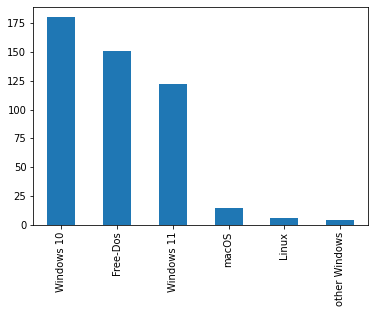

In [38]:
laptop_df2.OpSys.apply(extract_os).value_counts().plot(kind='bar')

In [41]:
laptop_df2["OpSys"].value_counts()

Windows 10                            81
Windows 11 Home                       60
Windows 10 Home                       54
Windows 11                            28
Free DOS                              27
                                      ..
Battery type: 3-cell, 41 Wh Li-ion     1
Win 10 PRO                             1
6-cell, 83 Wh Li-ion polymer           1
Windows 10 Home 64 bit                 1
RTX 3070Ti 8GB GDDR6                   1
Name: OpSys, Length: 107, dtype: int64

In [42]:

def extract_ram(text):
  text = text.upper()
  p1 = r"\d+\.\d+GB|\d+GB"
  p2 = r"\d+\.\d+ GB|\d+ GB"

  if len(re.findall(p1, text)) > 0:
    return re.findall(p1, text)[0]

  elif len(re.findall(p2, text)) > 0:
    return re.findall(p2, text)[0]
  return np.NaN

In [43]:
extract_ram("4 gb 2400MHz DDR4 SDRAM\n(Extra ram slot avail 51 gb radf")

'4 GB'

In [44]:
laptop_df2["Ram"].apply(extract_ram)

0      4GB
1      8GB
2      8GB
3      NaN
4      8GB
      ... 
472    8GB
473    NaN
474    NaN
475    8GB
476    8GB
Name: Ram, Length: 477, dtype: object

In [45]:
laptop_df1["Ram"] = laptop_df1["Ram"].apply(extract_ram)

In [46]:
laptop_df2["Ram"] = laptop_df2["Ram"].apply(extract_ram)

In [47]:
laptop_df3["Ram"] = laptop_df3["Ram"].apply(extract_ram)

In [67]:
laptop_df2["Ram"].isnull().sum()

0

In [66]:
laptop_df2.drop(laptop_df2[laptop_df2["Ram"].isna()].index, axis=0, inplace=True)

In [76]:
laptop_df2.shape

(416, 9)

In [79]:
laptop_df2.reset_index(drop=True, inplace=True)

In [80]:
laptop_df2.head()

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight
0,ASUS X515MA 15.6-inch Full HD Display Celeron ...,"42,500 bdt",Intel Celeron N4020 Processor 1.1 GHz (4M Cach...,"15.6-inch,FHD (1920 x 1080) 16:9, Anti-glare d...",4GB,1TB HDD ( M.2 Slot available ),Intel UHD Graphics 605,Windows 10,1.80 kg
1,ASUS VivoBook 15 X515EA 15.6 inch Full HD Disp...,"78,000 bdt","Intel Core i5-1135G7 Processor (8M Cache, 2.40...","15.6-inch, FHD (1920 x 1080) 16:9, Anti-glare ...",8GB,512GB PCI-E G3 SSD (Extra HDD Slot Available),Intel Iris Xe Graphics,Windows 10,1.80 kg
2,ASUS TUF F15 FX506HE 15.6 inch 144Hz Full HD D...,"131,500 bdt",Intel Core i5-11400H Processor (2.7GHz up to 4...,"15.6-inch,FHD (1920 x 1080) 16:9,anti-glare di...",8GB,512GB M.2 NVMe PCIe 3.0 SSD,NVIDIA GeForce RTX 3050Ti 4GB GDDR6,"Windows 10, 64 -bit",2.30 kg
3,Asus ZenBook 14 UX425JA 14 inch Full HD LED Ba...,"108,000 bdt","Intel Core i7-1065G7 Processor (8M Cache, 1.30...","14.0-inch, LCD, FHD (1920 x 1080) 16:9, IPS-le...",8GB,512GB PCIe NVMe 3.0 x2 M.2 SSD,Intel UHD Graphics,Windows 10,1.17 kg
4,ASUS X515MA 15.6-inch Full HD Display Celeron ...,"42,500 bdt",Intel Celeron N4020 Processor 1.1 GHz (4M Cach...,"15.6-inch,FHD (1920 x 1080) 16:9, Anti-glare d...",4GB,1TB HDD ( M.2 Slot available ),Intel UHD Graphics 605,Windows 10,1.80 kg


In [111]:

def extract_inch(text):
  text = text.lower()
  p1 = r"\d+\.\d+(?=-inch)"
  p2 = r"\d+\.\d+(?= inch)"
  p3 = r"\d+\.\d+(?=inch)"  
  p4 = r"\d+\.\d+(?=″)"
  p5 = r"\d+\.\d+(?= ″)"

  if len(re.findall(p1, text)) > 0:
    return re.findall(p1, text)[0]

  elif len(re.findall(p2, text)) > 0:
    return re.findall(p2, text)[0]

  elif len(re.findall(p3, text)) > 0:
    return re.findall(p3, text)[0]

  elif len(re.findall(p4, text)) > 0:
    return re.findall(p4, text)[0]

  elif len(re.findall(p5, text)) > 0:
    return re.findall(p5, text)[0]
  return np.NaN 


In [116]:
laptop_df1["Inch"] = laptop_df1["ScreenResolution"].apply(extract_inch)

In [117]:
laptop_df2["Inch"] = laptop_df2["ScreenResolution"].apply(extract_inch)

In [118]:
laptop_df3["Inch"] = laptop_df3["ScreenResolution"].apply(extract_inch)

In [125]:
laptop_df1["Inch"] = laptop_df1["Inch"].astype('float')
laptop_df2["Inch"] = laptop_df2["Inch"].astype('float')
laptop_df3["Inch"] = laptop_df3["Inch"].astype('float')

In [129]:
laptop_df1[laptop_df1["Inch"].isnull()]

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
6,"HP 15s-eq2690AU Ryzen 5 5500U 15.6"" FHD Laptop","72,740 bdt",AMD Ryzen 5 5500U,"15.6"" FHD (1920 x 1080) Display FeaturesMicro-...",8GB,PCIe NVMe SSD 512 GB,AMD Radeon Graphics Shared,Windows 10 Home,1.69 kg,NaN
8,"HP 15s-eq3234AU Ryzen 5 5625U 15.6"" FHD Laptop","74,370 bdt",AMD Ryzen 5 5625U,"15.6"" diagonal. IPS FHD (1920 x 1080) Display ...",8GB,PCIe NVMe M.2 SSD 512 GB,AMD Radeon Graphics Shared,Windows 11 Home Other Pre-installed SoftwaresM...,1.7 kg,NaN
9,"HP 14s-dq5445TU Core i5 12th Gen 14"" FHD Laptop","81,960 bdt",Intel Core i5-1235U,14 Inch IPS FHD (1920 x 1080) Display Features...,8GB,PCIe NVMe M.2 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 11 Home Other Pre-installed SoftwaresM...,1.47kg,NaN
10,HP 15s-du3039TX Core i5 11th Gen MX450 2GB Gra...,"83,590 bdt",Intel Core i5-1135G7,15.6 FHD (1920 x 1080) Touch ScreenNo Display ...,8GB,SATA HDD 1TB,Nvidia MX450 Graphics 2GB,Windows 10 Home 64 Other Pre-installed Softwar...,1.75 kg,NaN
12,"HP ProBook 440 G8 Core i5 11th Gen 14"" HD Laptop","93,300 bdt",Intel Core i5-1135G7,14 Inch LED HD (1366 x 768) Touch ScreenNo,8GB,PCIe NVMe M.2 SSD 512GB,Intel Iris Xe Graphics Shared,Fee DOS,1.38 kg,NaN
...,...,...,...,...,...,...,...,...,...,...
231,Toshiba Dynabook Satellite Pro C40-G-109 Celer...,"32,380 bdt",Intel Celeron 5205U,"14 Inch HD (1,366 x 768) Touch ScreenNo Displa...",4GB,M.2 SATA SSD 128GB,Intel UHD Graphics Shared,Windows 10 Pro,1.55 kg,NaN
232,Toshiba Dynabook Satellite Pro C40-G-11I Core ...,"48,870 bdt",Intel Core i3 10110U,"14 Inch HD (1,366 x 768) Touch ScreenNo Displa...",8GB,M.2 SATA SSD 256GB,Intel UHD Graphics Shared,Free Dos,1.55 kg,NaN
233,Toshiba Dynabook Satellite Pro C40-G-13E Core ...,"58,630 bdt",Intel Core i5-10210U,"14 Inch HD (1,366 x 768) Touch ScreenNo Displa...",8GB,M.2 SATA SSD 256GB,Intel UHD Graphics Shared,Windows 11 Home,1.55 kg,NaN
245,"Huawei MateBook B3-420 Core i5 11th Gen 14"" FH...","81,420 bdt",Intel Core i5-1135G7,14 inch IPS FHD (1920 x 1080) Touch ScreenNo,8GB,NVMe PCle SSD 512GB,Intel Iris Xe Graphics Shared,Windows 11 Home,1.38 kg,NaN


In [173]:
laptop_df1["Brand"] = laptop_df1["Name"].apply(lambda x:x.upper().split()[0])
laptop_df2["Brand"] = laptop_df2["Name"].apply(lambda x:x.upper().split()[0])
laptop_df3["Brand"] = laptop_df3["Name"].apply(lambda x:x.upper().split()[0])

In [174]:
laptop_df1.head(2)

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch,Brand
0,"HP 15s-du3611TU Core i3 11th Gen 15.6"" FHD Laptop","58,090 bdt",Intel Core i3-1125G4,15.6 Inch FHD (1920 x 1080) Display FeaturesMi...,4GB,SATA HDD 1 TB,Intel UHD Graphics Shared,Windows 11 Home,1.75 kg,15.6,HP
1,"HP 250 G8 Core i3 11th Gen 15.6"" FHD Laptop","62,430 bdt",Intel Core i3-1115G4,15.6 Inch IPS FHD (1920 x 1080) Display Featur...,8GB,SATA HDD 1TB,Intel UHD Graphics Shared,Windows 10 Home,1.47 kg,15.6,HP


In [169]:
laptop_df1["Inch"] = laptop_df1["Inch"].fillna(laptop_df1["Inch"].mean())
laptop_df2["Inch"] = laptop_df2["Inch"].fillna(laptop_df1["Inch"].mean())
laptop_df3["Inch"] = laptop_df3["Inch"].fillna(laptop_df1["Inch"].mean())

In [175]:
laptop_df1.drop("Brand", axis=1, inplace=True)
laptop_df2.drop("Brand", axis=1, inplace=True)
laptop_df3.drop("Brand", axis=1, inplace=True)

In [177]:
laptop_df2.head(2)

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
0,ASUS X515MA 15.6-inch Full HD Display Celeron ...,"42,500 bdt",Intel Celeron N4020 Processor 1.1 GHz (4M Cach...,"15.6-inch,FHD (1920 x 1080) 16:9, Anti-glare d...",4GB,1TB HDD ( M.2 Slot available ),Intel UHD Graphics 605,Windows 10,1.80 kg,15.6
1,ASUS VivoBook 15 X515EA 15.6 inch Full HD Disp...,"78,000 bdt","Intel Core i5-1135G7 Processor (8M Cache, 2.40...","15.6-inch, FHD (1920 x 1080) 16:9, Anti-glare ...",8GB,512GB PCI-E G3 SSD (Extra HDD Slot Available),Intel Iris Xe Graphics,Windows 10,1.80 kg,15.6


In [178]:
laptop_df3.head(2)

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
0,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,"122,060 bdt",Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8GB,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,"macOS App Store, Books, Calendar, Contacts, Fa...",1.29kg,15.23253
1,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,"122,060 bdt",Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8GB,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,"macOS App Store, Books, Calendar, Contacts, Fa...",1.29kg,15.23253


In [183]:

laptop_price_2023BD_myself = pd.concat((laptop_df1, laptop_df2, laptop_df3), axis=0)


In [185]:
laptop_price_2023BD_myself.reset_index(drop=True, inplace=True)

In [186]:
laptop_price_2023BD_myself

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
0,"HP 15s-du3611TU Core i3 11th Gen 15.6"" FHD Laptop","58,090 bdt",Intel Core i3-1125G4,15.6 Inch FHD (1920 x 1080) Display FeaturesMi...,4GB,SATA HDD 1 TB,Intel UHD Graphics Shared,Windows 11 Home,1.75 kg,15.60000
1,"HP 250 G8 Core i3 11th Gen 15.6"" FHD Laptop","62,430 bdt",Intel Core i3-1115G4,15.6 Inch IPS FHD (1920 x 1080) Display Featur...,8GB,SATA HDD 1TB,Intel UHD Graphics Shared,Windows 10 Home,1.47 kg,15.60000
2,"HP 15s-eq2171AU Ryzen 3 5300U 15.6"" FHD Laptop","64,600 bdt",AMD Ryzen 3 5300U,15.6 Inch FHD (1920 x 1080) Touch ScreenNo Dis...,8GB,PCIe NVMe M.2 SSD 512 GB,AMD Radeon Graphics Shared,Windows 11 Home,1.69 kg,15.60000
3,"HP 15s-fq5486TU Core i3 12th Gen 15.6"" FHD Laptop","62,970 bdt",Intel Core i3-1215U,15.6 Inch IPS FHD (1920 x 1080) Display Featur...,4GB,PCIe NVMe M.2 SSD 256 GB,Intel UHD Graphics Shared,Windows 11 Home,1.7 kg,15.60000
4,"HP 15s-fq5487TU Core i3 12th Gen 15.6"" FHD Laptop","67,310 bdt",Intel Core i3-1215U,15.6 Inch IPS FHD (1920 x 1080) Display Featur...,8GB,PCIe NVMe M.2 SSD 256 GB,Intel UHD Graphics Shared,Windows 11 Home,1.7 kg,15.60000
...,...,...,...,...,...,...,...,...,...,...
1002,Gigabyte AORUS 5 SE4 Intel Core i7 12700H 15.6...,"250,640 bdt",Intel Core i7 12th (Intel) Core i7 12700H 2.30...,15.6 FHD LED Display Full HD 1920x1080 Anti-gl...,16GB,512GB SSD No HDD No HDD Not Specified NVMe PCI...,NVIDIA GeForce RTX 3070 Graphics Dedicated 8GB...,Win-11 Home Not Specified Not Specified,2.30kg,15.23253
1003,HP OMEN 16-c0456AX AMD Ryzen 9 5900H 16.1 Inch...,"260,400 bdt",AMD Ryzen 9 Not Applicable Ryzen 9 5900H 3.10 ...,16.1 FHD IPS LED Display Full HD 1920x1080 Ant...,16GB,1TB SSD No HDD No HDD Not Specified NVMe PCIe ...,Nvidia RTX 3070 Dedicated 8GB GDDR6,Win-11 Home Not Specified Microsoft Office,2.3kg,15.23253
1004,Asus ROG Zephyrus G14 GA402RJ AMD Ryzen 9 6900...,"279,930 bdt",AMD Ryzen 9 Not Applicable Ryzen 9 6900HS 3.30...,15.6 WQXGA IPS LED Display QHD 2560x1600 Anti-...,16GB,1TB SSD No HDD No HDD Not Specified NVMe PCIe ...,AMD Radeon RX 6700S Graphics Dedicated 8GB GDDR6,"Win-11 Home Built-in Apps: McAfee, MyASUS, Scr...",1.72 kg,15.23253
1005,Asus ROG Zephyrus G15 GA503RM AMD Ryzen 7 6800...,"284,270 bdt",AMD Ryzen 7 Not Applicable Ryzen 7 6800HS 3.20...,15.6 2K WQHD LED QHD 2560x1440 Anti-glare No 2...,16GB,1TB SSD No HDD No HDD Not Specified NVMe PCIe ...,Nvidia RTX 3060 Graphics Dedicated 6GB GDDR6,Win-11 Home Not Specifiedc Not Specified,1.90kg,15.23253


In [187]:

## final DAtaset:

laptop_price_2023BD_myself.to_csv("laptop_price_2023BD_myself.csv")
